In [1]:
print('load libraries')
import xarray as xr
import numpy as np
import dask
from tqdm import tqdm
import pandas as pd
import xwmb
import cftime

load libraries


In [2]:
mt_path = "/pub/mariant3/WarmWaterMasses/notebooks/02_mhw_metrics/data_ocetrac-labels/"
blobs = xr.open_dataset(f"{mt_path}/01860503-01901020_ocetrac-labels-region.nc")
labels = blobs.blobs.rename('event_mask')
df = pd.read_pickle(f"{mt_path}/01860503-01901020_mhw-metrics-region.pkl")
wmt = xr.open_dataset("/pub/mariant3/WarmWaterMasses/notebooks/04_WMT-MHW/WMT_data/0186-0189_wmt-daily.nc")
budgets = xr.open_dataset("/pub/mariant3/WarmWaterMasses/notebooks/04_WMT-MHW/WMT_data/mhw_budgets_0186-0189.nc")

In [5]:
budgets.isel(mhw=0)

<xarray.Dataset>
Dimensions:                                    (time: 1459,
                                                thetao_l_target: 440,
                                                time_bounds: 1460,
                                                thetao_i_target: 441, xh: 269,
                                                yh: 130)
Coordinates: (12/13)
  * time                                       (time) object 0186-01-02 12:00...
  * thetao_i_target                            (thetao_i_target) float64 -4.0...
  * time_bounds                                (time_bounds) object 0186-01-0...
  * xh                                         (xh) float64 -137.9 ... -69.91
  * yh                                         (yh) float64 10.2 10.44 ... 39.07
  * thetao_l_target                            (thetao_l_target) float64 -4.0...
    ...                                         ...
    geolon                                     (yh, xh) float32 ...
    areacello                                  (yh, xh) float32 ...
    deptho                                     (yh, xh) float32 ...
    lon                                        (yh, xh) float32 ...
    lat                                        (yh, xh) float32 ...
    mhw                                        int64 3
Data variables: (12/21)
    surface_ocean_flux_advective_negative_lhs  (time, thetao_l_target) float64 ...
    surface_exchange_flux                      (time, thetao_l_target) float64 ...
    diffusion                                  (time, thetao_l_target) float64 ...
    frazil_ice                                 (time, thetao_l_target) float64 ...
    Eulerian_tendency                          (time, thetao_l_target) float64 ...
    bottom_flux                                (time, thetao_l_target) float64 ...
    ...                                         ...
    mass_tendency                              (time, thetao_l_target) float64 ...
    dt                                         (time) float64 ...
    Leibniz_material_derivative                (time, thetao_l_target) float64 ...
    spurious_numerical_mixing                  (time, thetao_l_target) float64 ...
    advection_plus_BC                          (time, thetao_l_target) float64 ...
    diabatic_advection                         (time, thetao_l_target) float64 ...
Attributes:
    mhw:      Description of MHW ID number

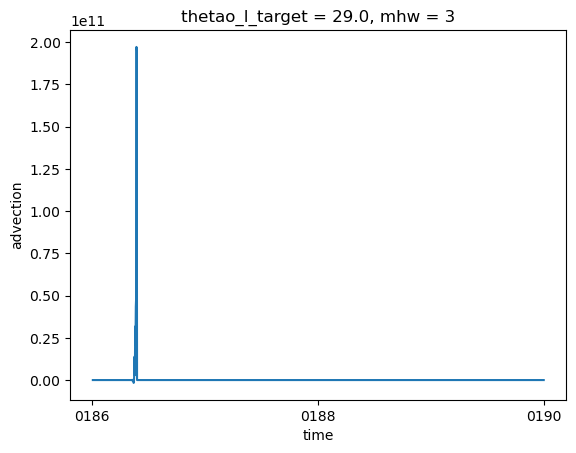

In [7]:
budgets.isel(mhw=0).sel(thetao_l_target=29,method='nearest').advection.plot()

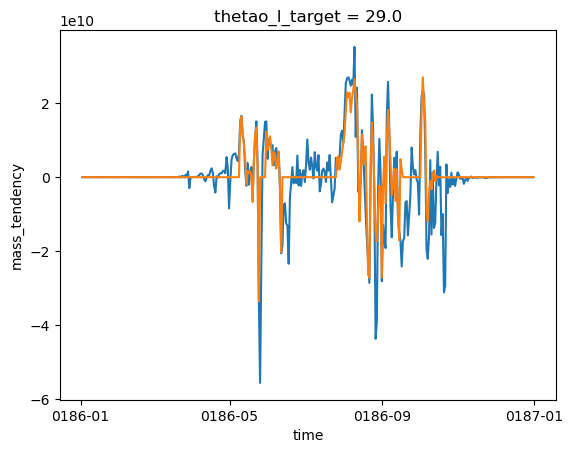

In [25]:
wmt.mass_tendency.sel(thetao_l_target=29, method='nearest').sel(time=slice('0186','0186')).plot()
budgets.mass_tendency.sel(thetao_l_target=29, method='nearest').sel(time=slice('0186','0186')).sum('mhw').plot()

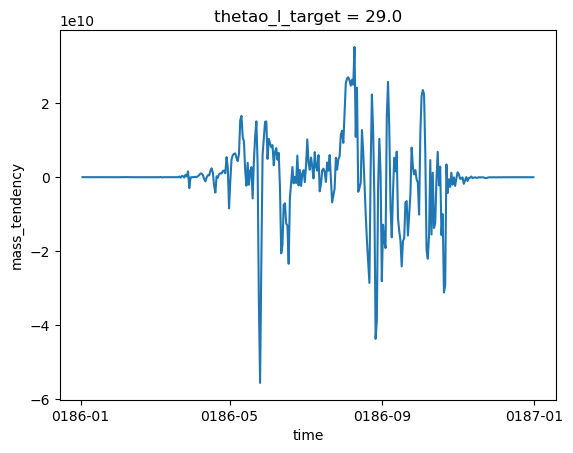

In [21]:
wmt.mass_tendency.sel(thetao_l_target=29, method='nearest').plot()

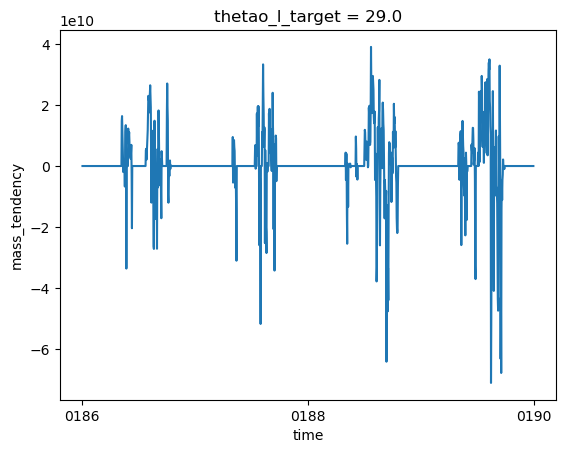

In [20]:
budgets.mass_tendency.sel(thetao_l_target=29, method='nearest').sum('mhw').plot()